<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S I S T E M A  -   D   E  -  I N V E N T A R I O S

La demanda mensual de un cierto producto, sigue la siguiente distribución de probabilidad empírica:

![texto alternativo](https://drive.google.com/uc?id=1i2BtgMyQSJWOi10G1a9UePcG8VItpgzJ)

El tiempo de entrega está distribuido de acuerdo a la siguiente función de probabilidad:

![texto alternativo](https://drive.google.com/uc?id=1VsRSh1p00wfRk-xqdk6YuxcNu0d_Uc6x)

Los factores estacionales para cada uno de los meses del año son como se muestra acontinuación:

![texto alternativo](https://drive.google.com/uc?id=1ei4oObcvT8qq2J77MLS8ar3EIEaWhTfh)

La información con respecto a los costos relevantes es la siguiente:

$$\text{Costo de ordenar = } \$ 100 \text{ /orden}$$ $$\text{Costo de inventario = } \$ 20 \text{ /unidad/año}$$ $$\text{Costo de faltante = } \$ 50 \text{ /unidad}$$

Si el inventario inicial se asume en 150 unidades, ¿ determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$?




S   O   L   U   C    I    Ó    N

In [75]:
#Importamos las librerias necesarias

import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

Aplicamos el método de la transformada inversa para simular los valores de la demanda como nos muestra el ejemplo del libro.

In [76]:
def demanda():                            #Con esta función calcularemos la demanda
  proba=[0,0.01,0.025,0.045,0.065, 0.087,0.11,0.135,0.162,0.19,0.219,0.254,0.299,0.359,0.424,0.494,0.574,0.649,0.719,0.784,0.844, 0.894,0.934,0.964,0.980,0.995,1]
  u=rnd.random()
  for i in range(len(proba)):
      if proba[i-1] <= u <= proba[i]:     # Ubicamos el valor de nuestro número aleatorio en los intervalos
          x=i+34                          #Asignamos el valor de demanda "x"
          break
  return x,u

Para calcular la demanda ajustada, tomaremos en cuenta los factores estacionales para cada uno de los meses del año que nos presenta el ejemplo, los cuales son los que se muestran en factor_est, finalmente tendremos que
$$ \text{Demanda ajustada } = x *(\text{factor_est}) $$

esto para un periodo de 12 meses

In [77]:
def demanda_ajustada(x,mes):              #Con esta función calcularemos la demanda ajustada
  factor_est=[1.2, 1, 0.9, 0.8, 0.8 ,0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
  for j in range(len(factor_est)):
    if mes==j:                            # Posteriormente se creo un for mara ubicar los 12 meses
                                          # Ubicamos el mes
      x=round(x*factor_est[j-1])          # Multiplicamos la demanda por el factor
  return x

Ubicamos el tiempo de entrega como se menciono al primcipio del problema.

In [78]:
def tiemp_entrega(carga_pend,cont_ent):   # Calculamos el tiempo de entrega (y estatus de entrega pendiente)
  carga_pend=True                         #Indica que hay entrega pendiente

  v=rnd.random()
  if 0<= v < 0.3:                         #Asignamos valor a el tiempo de entrega dependiendo su probabilidad
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3
  cont_ent+=1
  return  entrega,carga_pend,cont_ent


El sitema de inventarios que se analiza es lote constante y tiempo entre pedidos variables. Las variables de desición para este modelo son la cantidad de ordenar $q$ y el niver de reorden $R$ , las cuales minimizan los costos totales del inventario (costo de ordenar, costo de llevar inventario y costo faltante). En este caso para simular el manual del sistema de inventarios tendremos que  $q=200$ y $R = 100$

In [79]:
# Inicializaos valores iniciales
def inventario(q, R):                        # Definimos nuestra función de inventario
 inv_inicial=150
 inventario_i=[150]                          # Guardamos el inventario inicial en una lista en cual es de 150
 inv_falt=0                                  # Al comienzo no se cuenta con inventario faltante
 carga_pend=False                            # Indicamos que no hay carga pendiente
 tie_entrega=0                               # No hay tiempo de entrega
 cont=-1                                     # Comenzamos en -1 para comenzar a contar desde la siguiente iteracion
 faltante=0
 lista=[]                                     # Lista para imprimir tabla
 cont_ent=0
 for m in range(12):                         # Consideramos un ciclo de 12 meses
   mes=m+1
   dem,val=demanda()                         # Mandamos a llamar nuestra función de demanda
   dem_ajus=demanda_ajustada(dem,mes)        # Calculamos la  demanda ajustada

   inv_final=inv_inicial-dem_ajus            # Calculamos la demanda final
   dem_prom=(inv_inicial+dem_ajus)/2     # Calculamos la demanda promedio mensual

   if inv_final<=R and carga_pend==False:    # Si se pasa el punto de reorden y no hay carga pendiente
     tie_entrega,carga_pend,cont_ent=tiemp_entrega(carga_pend,cont_ent)  # Calculamos el tiempo de entrega

   if carga_pend==True:                        # La entrega aumentara en 1
     cont+=1

   if inv_final<0:                             # Si el inventario final es negativo, se imprime "-"
     faltante=abs(inv_final)
     lista.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{tie_entrega}",f"{np.round(inv_inicial**2/(2*dem_ajus))}"])
     inv_falt+=faltante
   else:
     lista.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{tie_entrega}",f"{np.round(dem_prom)}"])

   inv_inicial=inv_final                       # Inventario final pasa a ser inventario incial en el siguiente mes

   if cont==tie_entrega:                       # Si se cumple tiempo de entrega
     cont=-1
     inv_inicial+=q                            # Ordenamos el inventario
     carga_pend=False                          #Indica que ya no hay carga pendiente
     tie_entrega=0                             # Reinicia tiempo de entrega

   faltante=0                                  # Reinicia inventario faltante
   inventario_i.append(inv_inicial)            # Guarda inventario inicial en una lista

 suma_inv_prom = sum(float(fila[-1]) for fila in lista) # calculamos la demanda promedio mensual
 costo_total = cont_ent * R + suma_inv_prom * 1.67 + inv_falt * 50 # Calculamos el costo total del inventario

 return costo_total, lista, inventario_i, cont_ent, suma_inv_prom, inv_falt


In [84]:
# Asignamos los valores de q y R
costo_total, lista, inventario_i, cont_ent, suma_inv_prom, inv_falt = inventario(200, 100)

In [85]:
# Imprimimos nuestra tabla
headers = ['Mes', 'Inventario inicial' ,'Num_aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(lista, headers=headers, tablefmt="fancy_grid",showindex=False))

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   Num_aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │        0.275174 │        46 │                 55 │ 95                 │          0 │         2 │                           102 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   95 │        0.392958 │        48 │                 48 │ 47                 │          0 │         2 │                            72 │
├───────┼───────────────────

El inventario inicial queda fijo, el cual es 150, apartir de ahi ira variando dependiendo el número aleatorio que se genere. Simulamos para un año de operación del sistema de inventarios.

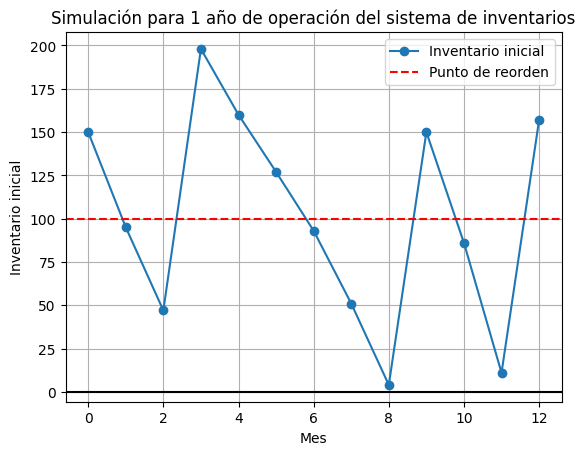

In [86]:
#Imprime gráfica
plt.plot(inventario_i, marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sistema de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="red",linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

Veamos que en este caso especifico , al final del primer mes , el nivel de existencia es menor que el nivel de reorden, por lo cual el primer orden es colocado, de acuerdo con nuestra tabla anterior el tiempo de entrega de este primer orden es de 2 meses, por lo que se tendria un total de 3 ordenes correspondientes al primer mes, sexto mes y decimo mes respectivamente.
Ahora calcularemos los costos totales anuales del sistema de inventario.

In [87]:
costo = [cont_ent * 100, suma_inv_prom * 1.67, inv_falt * 50, costo_total]
print(tabulate([costo], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                         1329.32 │                4750 │       6379.32 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


Por lo que el costo total anual de nuestro sistema de inventarios para este caso en especifico es de $\$ 6379.32$




In [96]:
# Función objetivo para Hooke-Jeeves
def funcion_objetivo(params):
    q, R = map(int, params)
    costo_total, _, _, _, _, _ = inventario(q, R)
    return costo_total

In [97]:
# Método de Hooke-Jeeves
def hooke_jeeves(func, x0, delta, gamma, epsilon):
    x = np.array(x0, dtype=float)
    delta = np.array(delta, dtype=float)
    while np.any(delta > epsilon):
        improved = False
        for i in range(len(x)):
            for direction in [-1, 1]:
                x_new = x.copy()
                x_new[i] += direction * delta[i]
                if func(x_new) < func(x):
                    x = x_new
                    improved = True
                    break
            if improved:
                break
        if not improved:
            delta *= gamma
    return x


In [98]:
# Parámetros iniciales para Hooke-Jeeves
x0 = [200, 100]  # Valores iniciales de q y R
delta = [10.0, 10.0]  # Longitud de paso inicial como floats
gamma = 0.5  # Factor de reducción
epsilon = 0.01  # Criterio de parada

In [99]:
# Ejecutar Hooke-Jeeves
q_opt, R_opt = hooke_jeeves(funcion_objetivo, x0, delta, gamma, epsilon)
print(f'Valores óptimos: q = {q_opt}, R = {R_opt}')

Valores óptimos: q = 183.59375, R = 94.9609375


In [100]:
# Calcular el costo total con los valores óptimos
costo_total, lista, inventario_i, cont_ent, suma_inv_prom, inv_falt = inventario(int(q_opt), int(R_opt))
print(f'Costo total óptimo: {costo_total}')

Costo total óptimo: 4028.2200000000003
